In [3]:
import pandas as pd
employee_data = pd.read_csv("../data/salary_prediction_data.csv")

In [4]:
employee_data.head(5)

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [5]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [6]:
employee_data.shape

(1000, 7)

In [7]:
employee_data.isna().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

In [8]:
print(employee_data.Education.value_counts())

Education
High School    255
Bachelor       253
PhD            251
Master         241
Name: count, dtype: int64


In [21]:
print(employee_data.Location.value_counts())

Location
Suburban    345
Rural       345
Urban       310
Name: count, dtype: int64


In [22]:
print(employee_data.Job_Title.value_counts())

Job_Title
Director    275
Analyst     255
Manager     241
Engineer    229
Name: count, dtype: int64


In [23]:
print(employee_data.Gender.value_counts())

Gender
Male      516
Female    484
Name: count, dtype: int64


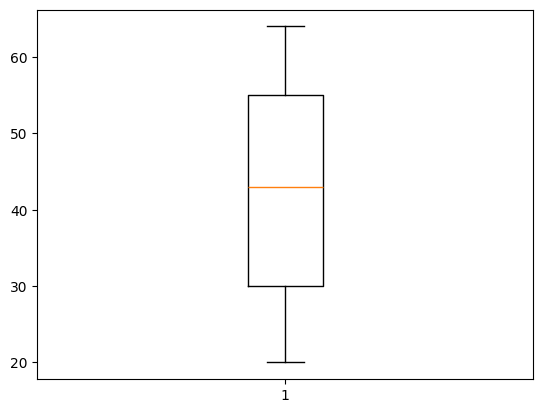

In [9]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(employee_data['Age'])
plt.show()

In [10]:
X = employee_data.drop('Salary', axis=1)
y = employee_data['Salary']

In [11]:
X.head(5)

,Education,Experience,Location,Job_Title,Age,Gender
0,High School,8,Urban,Manager,63,Male
1,PhD,11,Suburban,Director,59,Male
2,Bachelor,28,Suburban,Manager,61,Female
3,High School,29,Rural,Director,45,Male
4,PhD,25,Urban,Analyst,26,Female


In [12]:
y.head(5)

0     84620.053665
1    142591.255894
2     97800.255404
3     96834.671282
4    132157.786175
Name: Salary, dtype: float64

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
categorical_cols = ['Education', 'Location', 'Job_Title', 'Gender']
numerical_cols = ['Experience', 'Age']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

In [14]:
preprocessor

,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=0),
    'Random Forest': RandomForestRegressor(random_state=0),
    'Gradient Boosting': GradientBoostingRegressor(random_state=0)
}

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
# Split dataset for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {}

for name, model_algo in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model_algo)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    score = r2_score(y_test, y_pred)
    results[name] = {
        'model': pipeline,
        'r2_score': score
    }
    print(f"{name} R² Score: {score:.4f}")


Linear Regression R² Score: 0.8702
Decision Tree R² Score: 0.7087
Random Forest R² Score: 0.8377
Gradient Boosting R² Score: 0.8597


In [17]:
# Choose model with highest R² score
best_model_name = max(results, key=lambda name: results[name]['r2_score'])
best_model = results[best_model_name]['model']

print(f"\n✅ Best Model: {best_model_name}")



✅ Best Model: Linear Regression


In [18]:
new_data = pd.DataFrame([{
    'Education': 'PhD',
    'Experience': 10,
    'Location': 'Urban',
    'Job_Title': 'Manager',
    'Age': 40,
    'Gender': 'Male'
}])

predicted_salary = best_model.predict(new_data)
print(f"Predicted Salary: ${predicted_salary[0]:.2f}")


Predicted Salary: $139336.69


In [19]:
import pickle
pickle.dump(best_model, open("../Model/Salary_Prediction_Model.pkl",'wb'))